

# Project: Investigate a Dataset - No-Show Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This is an analysis of medical appointments dataset. The dataset has a record of over 110,000 patients in Brazil.Our goal is to analyse this dataset and find out the main causes of patients failing to attend the appointments. This will help the hospital save on cost and utilise the time that health workers waste while waiting for patients that end up not turning up. It will also help them schedule the appointment for the patients that are likely to attend hence serving many people in this case.

### Dataset Column Description
PatientId - Patient identification

AppointmentID - Appointment identification

Gender - Patient gender (Male or Female)

ScheduledDay - The day patient set up their appointment

AppointmentDay - The day of actual appointment of the patient Age - patient Age

Neighbourhood - Hospital location

Scholarship - Indicates whether or not the patient is on scholarship(0 for no and 1 for Yes)

Hipertension - Indicates whether or not the patient has hypertension or not(0 for no and 1 for Yes)

Diabetes - Indicates whether or not the patient has diabetes or not (0 for no and 1 for Yes)

Alcoholism - Indicates whether or not the patient has alcoholism or not (0 for no and 1 for Yes)

Handicap - Indicates whether or not the patient has handicap or not (on scale from 0 to 4 )

SMS_received = Indicates whether or not the patient received SMS (0 for no and 1 for Yes)

No-show = Indicates whether or not the patient attend the appointment(Yes for didn't show and No for show)





### Question(s) for Analysis
Which gender likely to show in plenty for the appointments?

Which age group will show the most?

Which disease has most patients showing for the appointment?

What improvements should be made?

In [71]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling



In [72]:
#import dataset and check first six rows
path = './noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(path)
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [73]:
#checking number of rows and columns
df.shape

(110527, 14)

The dataset has 110527 rows and 14 columns

In [74]:
#check relavant information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data has no missing values

In [75]:
#descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min value of age column is -1 which is imposible

In [76]:
#checking for duplicate values
df.duplicated().sum()

0

#Data Cleaning
drop the patientID and AppointmentID columns since we are not going to use them

drop the row with age value of -1

Change ScheduledDay and AppointmentDay types to Datetime


Change No-Show column type to int


In [77]:
#drop the patientID and AppointmentID
df.drop(["PatientId","AppointmentID"], axis= 1 , inplace= True)

In [79]:
#Change ScheduledDay and AppointmentDay types to Datetime
change_column_date = ["ScheduledDay", "AppointmentDay"]
for col in change_column_date:
    df[col] = pd.to_datetime(df[col])
    df.rename(columns = {col : col[:-3]+"_day"}, inplace=True)

In [80]:
#checking datatype
df.dtypes

Gender                          object
Scheduled_day      datetime64[ns, UTC]
Appointment_day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
No-show                         object
dtype: object

In [81]:
#changing the yes and no values to zero and ones in the no-show column
df['No-show'] = df['No-show'].map(
                   {'Yes':1 ,'No':0})

In [82]:
#split dataset into show and no-show patients
df1 = df[df['No-show'] == 0]
df2 = df[df['No-show'] == 1]

In [83]:
#check if dataset has been split successful
df1.shape

(88207, 12)

In [84]:
#confirm dataset has been split successful
df2.shape

(22319, 12)

<a id='eda'></a>
## Exploratory Data Analysis





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0199a81310>,
      dtype=object)

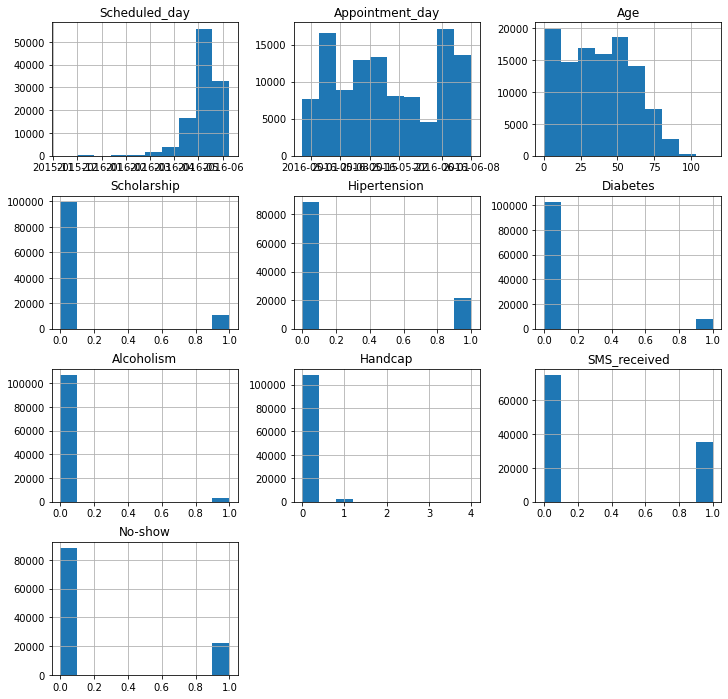

In [85]:
#check distribution of data using histograms
df.hist(figsize=(12,12), alpha=1)

In [86]:
#correlation between the columns
df_corr=df.corr()
df_corr.style.background_gradient(cmap='rainbow', axis=None)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No-show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


From the heatmap we notice that most patients who have hipertension have diabetes and the two are positively correlated to age. We also notice that patients who receive sms are likely to show since No-show and SMS-received are positively correlated.

In [87]:
#patients who attended
attended = df["No-show"].value_counts()
attended

0    88207
1    22319
Name: No-show, dtype: int64

The patients who attended are 88207 while those who didn't show are 22319.

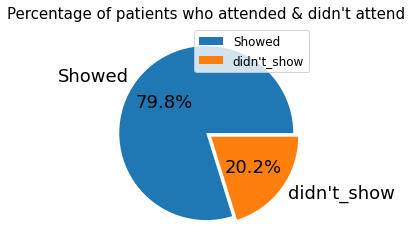

In [88]:
#pie chart to show attendance
plt.pie(attended,labels=["Showed", "didn't_show"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.07))
plt.rcParams['font.size'] = 12
plt.title("Percentage of patients who attended & didn't attend",fontsize=15)
plt.legend()
plt.show()

The pie chart shows that 20.2% of the patients didn't show while 79.8% of the patients showed for the appointment.

### Research Question 1 Which gender likely to show in plenty for the appointments?

In [89]:
#number of alcoholic patients who attended
df1['Gender'].value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [90]:
#unique values in gender
df1['Gender'].nunique()

2

Gender has two unique values that is female and male

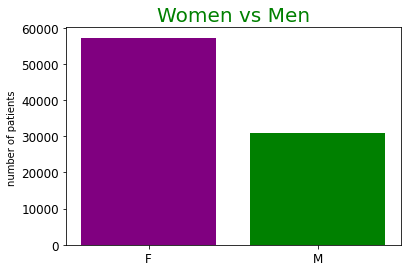

In [91]:
f,ax=plt.subplots()
ax.bar(df1['Gender'].value_counts().index[0],df1['Gender'].value_counts().values[0],label='F',color='purple')
ax.bar(df1['Gender'].value_counts().index[1],df1['Gender'].value_counts().values[1],label='M',color='green')
plt.ylabel('number of patients ',fontsize=10)
plt.title('Women vs Men',fontsize=20,color='green')
ax.set_label(['F','M'])
plt.show()

We can see that more women attended as compared to men

### Research Question 2  Which age group will show the most?

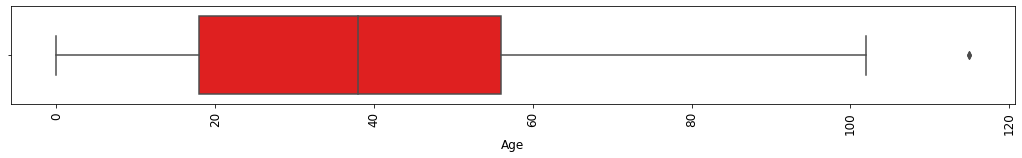

In [92]:
plt.figure(figsize=(18,1.8))
plt.xticks(rotation=90)
sns.boxplot(x=df1.Age,color="red");

Maximum age is 115, Minimum Age is 0 First quartile Age is 18 ,Median Age is 38 Third quartile Age is 56

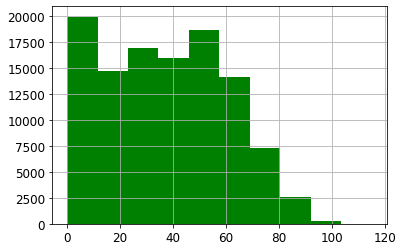

In [93]:
#checking for distribution for all patients
df["Age"].hist(color=["green"])

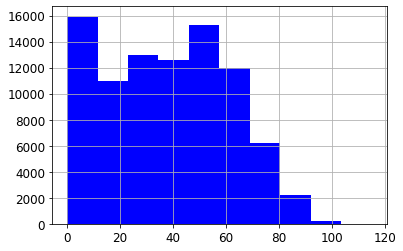

In [94]:
#checking for distribution for all patients
df1["Age"].hist(color=["blue"])

We notice that most patients that attended are from 0 to 2 years and from 50 to 115 attended. But some patients fro 15 years to 45 did not attend

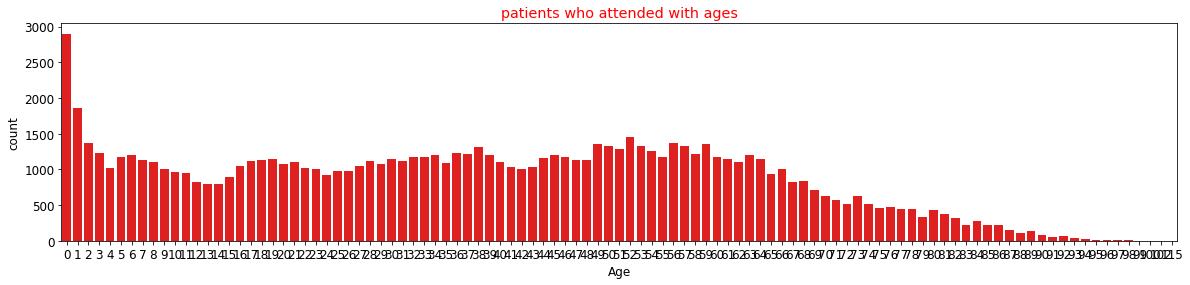

In [95]:
#patients who attended count
plt.figure(figsize=(20,4))
sns.countplot(x=df1.Age, color='red')
plt.title("patients who attended with ages", color='red');

The plot shows that patients who attended between 0 to 2 years are many compared to other ages.

### Research Question 3 - Which disease has most patients showing for the appointment?

###Hipertension column

In [96]:
#number of hipertension patients who attended
df1['Hipertension'].value_counts()

0    70178
1    18029
Name: Hipertension, dtype: int64

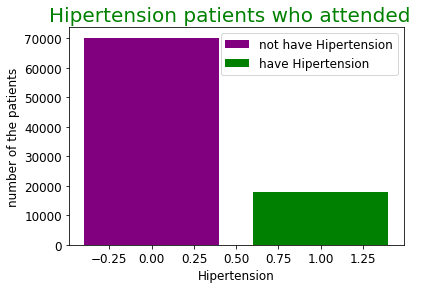

In [97]:
f,ax=plt.subplots()
ax.bar(df1['Hipertension'].value_counts().index[0],df1['Hipertension'].value_counts().values[0],label='not have Hipertension', color='purple')
ax.bar(df1['Hipertension'].value_counts().index[1],df1['Hipertension'].value_counts().values[1],label='have Hipertension', color='green')
plt.title('Hipertension patients who attended  ',fontsize=20, color='green')
plt.legend()
plt.xlabel('Hipertension')
plt.ylabel('number of the patients')
plt.show()

###Alcoholism column

In [98]:
#number of alcoholic patients who attended
df1['Alcoholism'].value_counts()

0    85524
1     2683
Name: Alcoholism, dtype: int64

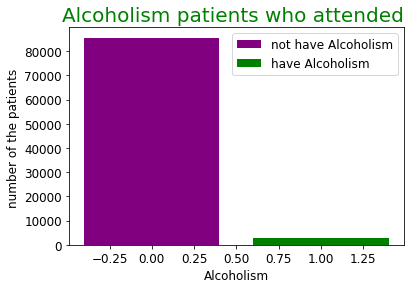

In [99]:
f,ax=plt.subplots()
ax.bar(df1['Alcoholism'].value_counts().index[0],df1['Alcoholism'].value_counts().values[0],label='not have Alcoholism', color='purple')
ax.bar(df1['Alcoholism'].value_counts().index[1],df1['Alcoholism'].value_counts().values[1],label='have Alcoholism', color='green')
plt.title('Alcoholism patients who attended ',fontsize=20, color='green')
plt.legend()
plt.xlabel('Alcoholism')
plt.ylabel('number of the patients ')
plt.show();

###Handicap Patients

In [100]:
#number of handcap patients who attended
df1['Handcap'].value_counts()

0    86373
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64

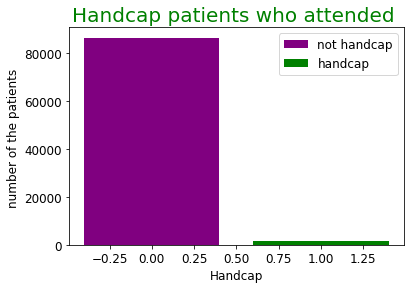

In [101]:
f,ax=plt.subplots()
ax.bar(df1['Handcap'].value_counts().index[0],df1['Handcap'].value_counts().values[0],label='not handcap', color='purple')
ax.bar(df1['Handcap'].value_counts().index[1],df1['Handcap'].value_counts().values[1],label='handcap', color='green')
plt.title('Handcap patients who attended ',fontsize=20, color='green')
plt.legend()
plt.xlabel('Handcap')
plt.ylabel('number of the patients ')
plt.show();

After analysing at least three diseases we notice that most patients from diffrent diseases turn up for attendance

### Research Question 4 - What improvements should be made?

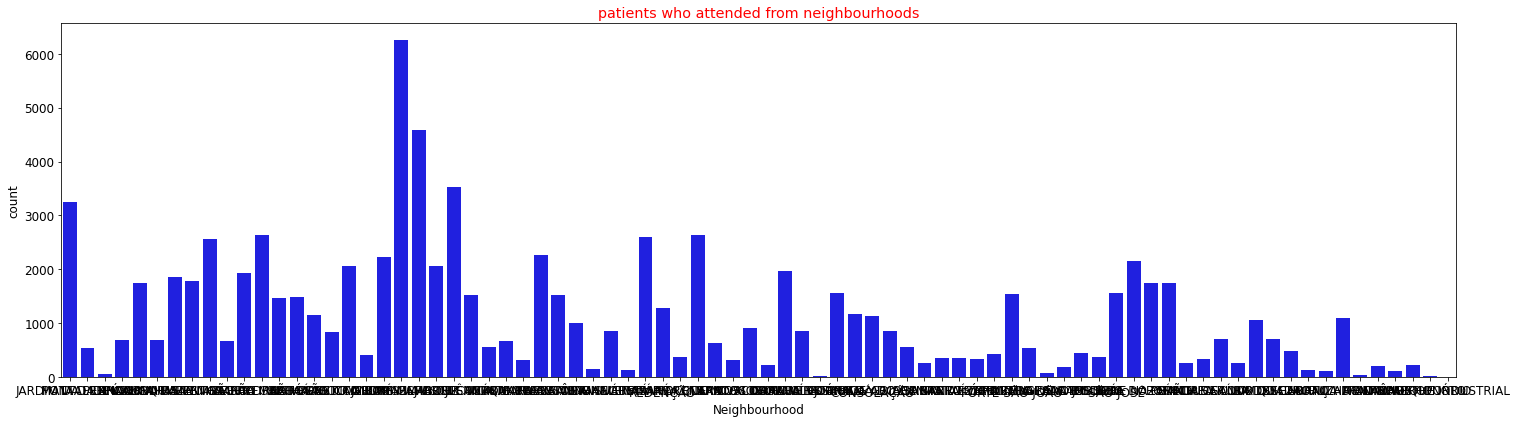

In [102]:
#patients who attended count
plt.figure(figsize=(25,6.5))
sns.countplot(x=df1.Neighbourhood, color='blue')
plt.title("patients who attended from neighbourhoods", color='red');

They should check the neighbourhood before scheduling appointments for the patients

In [103]:
#number of SMS-received patients who attended
df1['SMS_received'].value_counts()


0    62509
1    25698
Name: SMS_received, dtype: int64

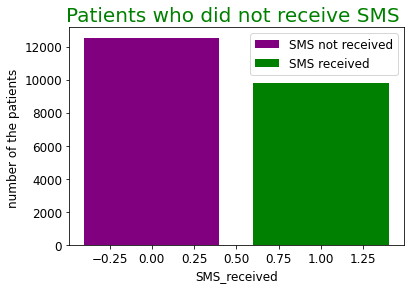

In [104]:
f,ax=plt.subplots()
ax.bar(df2['SMS_received'].value_counts().index[0],df2['SMS_received'].value_counts().values[0],label='SMS not received', color='purple')
ax.bar(df2['SMS_received'].value_counts().index[1],df2['SMS_received'].value_counts().values[1],label='SMS received', color='green')
plt.title('Patients who did not receive SMS ',fontsize=20, color='green')
plt.legend()
plt.xlabel('SMS_received')
plt.ylabel('number of the patients ')
plt.show();

There is no need of sending patients SMS since patients who did not receive SMS attended as well

<a id='conclusions'></a>
## Conclusions
Attendance is 79.8% from all patients already attended

20.2% didn't show

Female patients attended the most

Gender has no direct correlation with No-show column

Alcoholism has no direct correlation with No-show column

Hypertensive has no direct correlation with No-show column

Handcap has no direct correlation with No-show column

Diabetes has no direct correlation with No-show column

Scholarship has no direct correlation with No-show column

Receiving SMS has no correlation with No-show column since attendance rate for patients who have not received sms is high

Age group of 0 to 2 attend the appointments the most as compared to tenagers



## Limitations 

We could not use the scholarship column to make conclusions because most people in the dataset are not on scholarship. The same applies to the diseases columns and gender where most people are female.

Most people are not above 70 years so it is hard to tell if they had high attendance or low.